## Introduction:

PCA is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance

In other words,
PCA is dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important information.

## Need for PCA: 
   * High dimension data is extremely complex to process due to inconsistencies in the features which increase the computation time and make data processing and EDA more convoluted.
   * PCA is implement in majority of machine learning algorithms, as ML has a limitation it can't process or handle data of high dimension. So that's why PCA comes in spotlight. High dimensions data are used in image processing, NLP, etc.
   

## Steps in PCA:
  * Standardization of data
  * Computing covariance matrix
  * Calculating eigenvectors and eigenvalues
  * Computing the principal components
  * Reducing the dimensions of data

###  Standardization of data :
It is scaling of data in such a way that all variables and their values lie within same range. If we don't perform standardization, it may result into biased output.

In [1]:
import pandas as pd
data = {'Count':[1, 5, 6, 3], 'Value':[9998, 9518, 8995, 7890]} 
df = pd.DataFrame(data) 
df.head()

,Count,Value
0,1,9998
1,5,9518
2,6,8995
3,3,7890


In above table you can see that feature *Value* has bigger values compared to feature *Count*, hence it will have more impact on the output. Hence we need to scale it to make data in comparable range. Hence we narrow the *Value* feature to an acceptable range here. We can use formula:
![standardization](images/standardization.png)

### Computing the covariance:
Covariance matrix expresses the relation between the different variables in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces overall performance of the model.
The covariance value denotes how co-dependent two variables are.
    - Negative covariance: indirectly proportional
    - Positive covariance: directly proportional

Let's say if we have 5 variables then this matrix will be 5x5, for 2 variables, it will be 2x2, etc.
For 2x2, matrix will be:

*(Here cov(a,b) is covariance of variable a wrt b,
also covariance is commutative hence cov(a,b) = cov(b,a) )* 

In [2]:
# Representation in matrix form
cov_matrix = [["cov(a,a)", "cov(a,b)"], ["cov(b,a)", "cov(b,b)"]]
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in cov_matrix]))

cov(a,a)	cov(a,b)
cov(b,a)	cov(b,b)


### Calculating eigenvectors and eigenvalues:
- Eigenvectors are those vectors, when a linear transformation is peformed on them then their direction does not change. Eigenvalues denotes scalar values of respective eigenvectors.
- These should be calculated from covariance matrix
- We need eigenvectors and eigenvalues to determine the principal components in our dataset.
- **Principal components** are new set of variables that are obtained from initial set of variables. They are highly significant and independent of each others. They compress and possess most of the useful information that was scattered among initial variables.
- If dataset has `x` dimension then we have to form `x` principal components.
- To create first principal component(PC1), we have to form it in a way that it stores maximum possible information.
- For second principal component(PC2), it will store remaining maximum information of data. And this goes on till PCx.
- If dataset has `x` dimension then we have to calculate `x` eigenvectors and their respective eigenvalues.
- Using covariance matrix, eigenvectors determine where is maximum variance in dataset(as variance denotes more info).

### Computing the principal components:
- When we have eigenvectors and eigenvalues, we have to sort it in descending order, where eigenvector with max eigenvalue is most significant, and will form first principal component(PC1).
- Then like this we can get second most significant which will be our second principal component(PC2).

### Reducing the dimensions of data:
- Here we re-arrange the original data with respect to the final principal components which represents the maximum and the most significant info of the dataset.


In [3]:
print("For example:\n")
orig_data = {'movie_id':[1, 5, 6], 'title':["X", "Y", "Z"], 'genres': ["Action", "Rom-Com", "Thriller"], 'user_id': [1, 1, 1], 'rating': [5, 4, 3], 'date': ['16-01-2009', '04-04-2005', '31-12-2011']} 
old_df = pd.DataFrame(orig_data)
old_df

For example:



,movie_id,title,genres,user_id,rating,date
0,1,X,Action,1,5,16-01-2009
1,5,Y,Rom-Com,1,4,04-04-2005
2,6,Z,Thriller,1,3,31-12-2011


In [4]:
print("Can be converted to:")
new_data = {'movie_id':[1, 5, 6], 'user_id': [1, 1, 1], 'rating': [5, 4, 3], 'date': ['16-01-2009', '04-04-2005', '31-12-2011']} 
new_df = pd.DataFrame(new_data)
new_df

Can be converted to:


,movie_id,user_id,rating,date
0,1,1,5,16-01-2009
1,5,1,4,04-04-2005
2,6,1,3,31-12-2011


In [5]:
############### Code: ###################

# Reading libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
import seaborn

In [6]:
# Read dataset
movies = pd.read_csv("data/movies.csv")
print("Movies DF: ")
print(movies.head())
ratings = pd.read_csv("data/ratings.csv")
print("Ratings DF: ")
print(ratings.head())

Movies DF: 
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Ratings DF: 
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [7]:
# Remove timestamp column
ratings.drop(["timestamp"], axis=1, inplace=True)  # axis: drop from index (0 or ‘index’) or columns (1 or ‘columns’).
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [8]:
# Process_data
def replace_name(x):
    return movies[movies["movieId"] == x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=["userId"], columns=["movieId"], values=["rating"])
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)
# Peform standarization, but in our dataset it is not necessary
x_std = StandardScaler().fit_transform(df1)


In [9]:
# Now compute covariance matrix:
mean_vec = np.mean(x_std, axis=0)
print(mean_vec)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print("\n Covariance matrix: ")
print(cov_mat)

[-8.73618118e-18 -8.73618118e-18 -2.91206039e-17 ...  8.73618118e-18
 -4.36809059e-17 -8.73618118e-18]

 Covariance matrix: 
[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


In [ ]:
# Perform eigendecomposition on covariance matrix
cov_mat = np.cov(x_std.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
print("Eigenvector: {}\n".format(eigen_vectors))
print("Eigenvalues: {}".format(eigen_values))

In [ ]:
# Now sort eigen values in dataset to get most significant vectors
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
for i in eig_pairs:
    print(i[0])

In [45]:
# Just for analysis purpose, consider 2 components
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


Text(0, 0.5, 'cumulative explained variance')

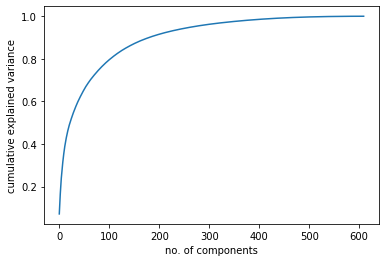

In [47]:
# For displaying overall:
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no. of components")
plt.ylabel("cumulative explained variance")
# Here we reduced from 9000 to 500